# Gold Glove Dataset

In [755]:
!pip install "polars[all]"

In [756]:
!pip install more_polars

In [757]:
import polars as pl
pl.Config.with_columns_kwargs = True

# Gold Glove 

In [758]:
Awards = pl.read_csv("./lahman_1871-2023_csv/AwardsPlayers.csv")
Awards

playerID,awardID,yearID,lgID,tie,notes
str,str,i64,str,str,str
"""poseybu01""","""Lou Gehrig Memorial Award""",2019,"""ML""",null,null
"""klubeco01""","""Lou Gehrig Memorial Award""",2018,"""ML""",null,null
"""vottojo01""","""Lou Gehrig Memorial Award""",2017,"""ML""",null,null
"""altuvjo01""","""Lou Gehrig Memorial Award""",2016,"""ML""",null,null
"""grandcu01""","""Lou Gehrig Memorial Award""",2015,"""ML""",null,null
…,…,…,…,…,…
"""barnhtu01""","""Gold Glove""",2017,"""NL""",null,"""C"""
"""goldspa01""","""Gold Glove""",2017,"""NL""",null,"""1B"""
"""lemahdj01""","""Gold Glove""",2017,"""NL""",null,"""2B"""


In [759]:
Awards = (Awards
          .select([pl.col('playerID'), pl.col('yearID'), pl.col('lgID'), pl.col('notes'), pl.col('awardID')])
          .filter(pl.col('yearID') >= 2013)
          .filter(pl.col('awardID') == "Gold Glove")
         )
Awards

playerID,yearID,lgID,notes,awardID
str,i64,str,str,str
"""kineris01""",2020,"""AL""","""3B""","""Gold Glove"""
"""crawfjp01""",2020,"""AL""","""SS""","""Gold Glove"""
"""roberlu01""",2020,"""AL""","""LF""","""Gold Glove"""
"""gordoal01""",2020,"""AL""","""CF""","""Gold Glove"""
"""gallojo01""",2020,"""AL""","""RF""","""Gold Glove"""
…,…,…,…,…
"""barnhtu01""",2017,"""NL""","""C""","""Gold Glove"""
"""goldspa01""",2017,"""NL""","""1B""","""Gold Glove"""
"""lemahdj01""",2017,"""NL""","""2B""","""Gold Glove"""


In [826]:
Fielding = pl.read_csv("./lahman_1871-2023_csv/Fielding.csv")
Fielding

playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
str,i64,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str
"""aardsda01""",2004,1,"""SFN""","""NL""","""P""",11,0,32,0,0,0,0,null,null,null,null,null
"""aardsda01""",2006,1,"""CHN""","""NL""","""P""",45,0,159,1,5,0,1,null,null,null,null,null
"""aardsda01""",2007,1,"""CHA""","""AL""","""P""",25,0,97,2,4,1,0,null,null,null,null,null
"""aardsda01""",2008,1,"""BOS""","""AL""","""P""",47,0,146,3,6,0,0,null,null,null,null,null
"""aardsda01""",2009,1,"""SEA""","""AL""","""P""",73,0,214,2,5,0,1,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""zwilldu01""",1915,1,"""CHF""","""FL""","""OF""",148,null,null,356,20,8,6,null,null,null,null,null
"""zwilldu01""",1916,1,"""CHN""","""NL""","""OF""",10,null,null,11,0,0,0,null,null,null,null,null
"""zychto01""",2015,1,"""SEA""","""AL""","""P""",13,1,55,0,3,0,0,null,null,null,null,null


In [851]:
Fielding_1 = (Fielding
          .select([pl.col('playerID'), pl.col('yearID'), pl.col('lgID'), pl.col('POS'), pl.col('G'), pl.col('GS'), pl.col('InnOuts'), pl.col('PO'), pl.col('A'), pl.col('E'),
                pl.col('DP'), pl.col('PB'), pl.col('WP'), pl.col('SB'), pl.col('CS'), pl.col('ZR')])
            .filter((pl.col('yearID') >= 2013))
            .group_by(pl.col('playerID'), pl.col('yearID'), pl.col('lgID'), pl.col('POS'))  
            .agg([pl.col('G').sum().alias('total_G'),
            pl.col('GS').sum().alias('total_GS'),
            pl.col('InnOuts').sum().alias('total_InnOuts'),
            pl.col('PO').sum().alias('total_PO'),
            pl.col('A').sum().alias('total_A'),
            pl.col('E').sum().alias('total_E'),
            pl.col('DP').sum().alias('total_DP'),
            pl.col('PB').sum().alias('total_PB'),
            pl.col('WP').sum().alias('total_WP'),
            pl.col('SB').sum().alias('total_SB'),
            pl.col('CS').sum().alias('total_CS'),
            pl.col('ZR').sum().alias('total_ZR')])
         )
Fielding_1

playerID,yearID,lgID,POS,total_G,total_GS,total_InnOuts,total_PO,total_A,total_E,total_DP,total_PB,total_WP,total_SB,total_CS,total_ZR
str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str
"""preslal01""",2016,"""NL""","""OF""",28,25,668,55,1,1,0,null,null,null,null,null
"""wadety01""",2019,"""AL""","""3B""",5,2,95,5,5,0,0,null,null,null,null,null
"""tayloch03""",2015,"""AL""","""2B""",4,2,60,5,1,1,1,null,null,null,null,null
"""shustja01""",2023,"""NL""","""P""",11,11,158,3,4,0,0,null,null,null,null,null
"""smithse01""",2015,"""AL""","""OF""",110,91,2393,163,6,1,1,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""feathta01""",2016,"""NL""","""2B""",4,3,77,9,6,0,3,null,null,null,null,null
"""santado01""",2017,"""NL""","""OF""",144,139,3634,224,4,5,1,null,null,null,null,null
"""gilbelo01""",2023,"""AL""","""P""",32,32,572,19,12,0,1,null,null,null,null,null


In [852]:
Gold_Glove = (Fielding_1 
                       .join(Awards, on=['playerID','yearID','lgID'], how='left')
                      )
Gold_Glove

playerID,yearID,lgID,POS,total_G,total_GS,total_InnOuts,total_PO,total_A,total_E,total_DP,total_PB,total_WP,total_SB,total_CS,total_ZR,notes,awardID
str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str
"""preslal01""",2016,"""NL""","""OF""",28,25,668,55,1,1,0,null,null,null,null,null,null,null
"""wadety01""",2019,"""AL""","""3B""",5,2,95,5,5,0,0,null,null,null,null,null,null,null
"""tayloch03""",2015,"""AL""","""2B""",4,2,60,5,1,1,1,null,null,null,null,null,null,null
"""shustja01""",2023,"""NL""","""P""",11,11,158,3,4,0,0,null,null,null,null,null,null,null
"""smithse01""",2015,"""AL""","""OF""",110,91,2393,163,6,1,1,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""feathta01""",2016,"""NL""","""2B""",4,3,77,9,6,0,3,null,null,null,null,null,null,null
"""santado01""",2017,"""NL""","""OF""",144,139,3634,224,4,5,1,null,null,null,null,null,null,null
"""gilbelo01""",2023,"""AL""","""P""",32,32,572,19,12,0,1,null,null,null,null,null,null,null


In [853]:
unique_Gold = Gold_Glove['awardID'].unique().to_list()
print(unique_Gold)

['Gold Glove', None]


In [854]:
Gold_Glove = Gold_Glove.with_columns(
    pl.when(pl.col("yearID") == 2020)
      .then(pl.lit("Validation"))
      .otherwise(pl.lit("Training"))
      .alias("Training_Validation")
)
Gold_Glove

playerID,yearID,lgID,POS,total_G,total_GS,total_InnOuts,total_PO,total_A,total_E,total_DP,total_PB,total_WP,total_SB,total_CS,total_ZR,notes,awardID,Training_Validation
str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str
"""preslal01""",2016,"""NL""","""OF""",28,25,668,55,1,1,0,null,null,null,null,null,null,null,"""Training"""
"""wadety01""",2019,"""AL""","""3B""",5,2,95,5,5,0,0,null,null,null,null,null,null,null,"""Training"""
"""tayloch03""",2015,"""AL""","""2B""",4,2,60,5,1,1,1,null,null,null,null,null,null,null,"""Training"""
"""shustja01""",2023,"""NL""","""P""",11,11,158,3,4,0,0,null,null,null,null,null,null,null,"""Training"""
"""smithse01""",2015,"""AL""","""OF""",110,91,2393,163,6,1,1,null,null,null,null,null,null,null,"""Training"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""feathta01""",2016,"""NL""","""2B""",4,3,77,9,6,0,3,null,null,null,null,null,null,null,"""Training"""
"""santado01""",2017,"""NL""","""OF""",144,139,3634,224,4,5,1,null,null,null,null,null,null,null,"""Training"""
"""gilbelo01""",2023,"""AL""","""P""",32,32,572,19,12,0,1,null,null,null,null,null,null,null,"""Training"""


In [855]:
Batting = pl.read_csv("./lahman_1871-2023_csv/Batting.csv")
Batting

playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str
"""aardsda01""",2004,1,"""SFN""","""NL""",11,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""aardsda01""",2006,1,"""CHN""","""NL""",45,null,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,null
"""aardsda01""",2007,1,"""CHA""","""AL""",25,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""aardsda01""",2008,1,"""BOS""","""AL""",47,null,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,null
"""aardsda01""",2009,1,"""SEA""","""AL""",73,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""zwilldu01""",1915,1,"""CHF""","""FL""",150,null,548,65,157,32,7,13,94,24,null,67,65,null,2,18,null,null,null
"""zwilldu01""",1916,1,"""CHN""","""NL""",35,null,53,4,6,1,0,1,8,0,null,4,6,null,0,2,null,null,null
"""zychto01""",2015,1,"""SEA""","""AL""",13,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null


In [766]:
Pitching = pl.read_csv("./lahman_1871-2023_csv/Pitching.csv")
Pitching

playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""aardsda01""",2004,1,"""SFN""","""NL""",1,0,11,0,0,0,0,32,20,8,1,10,5,0.417,6.75,0,0,2,0,61,5,8,0,1,1
"""aardsda01""",2006,1,"""CHN""","""NL""",3,0,45,0,0,0,0,159,41,24,9,28,49,0.214,4.08,0,1,1,0,225,9,25,1,3,2
"""aardsda01""",2007,1,"""CHA""","""AL""",2,1,25,0,0,0,0,97,39,23,4,17,36,0.3,6.4,3,2,1,0,151,7,24,2,1,1
"""aardsda01""",2008,1,"""BOS""","""AL""",4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2,3,5,0,228,7,32,3,2,4
"""aardsda01""",2009,1,"""SEA""","""AL""",3,6,73,0,0,0,38,214,49,20,4,34,80,0.19,2.52,3,2,0,0,296,53,23,2,1,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""zuverge01""",1958,1,"""BAL""","""AL""",2,2,45,0,0,0,7,207,74,26,4,17,22,0.28,3.39,3,2,6,0,294,23,29,null,null,null
"""zuverge01""",1959,1,"""BAL""","""AL""",0,1,6,0,0,0,0,39,15,6,1,6,1,0.3,4.15,0,1,0,0,55,1,7,null,null,null
"""zychto01""",2015,1,"""SEA""","""AL""",0,0,13,1,0,0,0,55,17,5,1,3,24,0.239,2.45,0,1,2,0,76,4,6,0,0,0


In [ ]:
Salaries = pl.read_csv("./lahman_1871-2023_csv/Salaries.csv")
Salaries

In [ ]:
SalaryNew = (Salaries
               .select([pl.col('yearID'), pl.col('playerID'), pl.col('salary')])
               .filter(pl.col('yearID') >= 2006)
               .group_by(pl.col('yearID'), pl.col('playerID'))
               .agg(pl.col('salary').sum().alias('total_salary'))
               
              )
SalaryNew

In [ ]:
FieldingNew = (Fielding
          .select([pl.col('playerID'), pl.col('yearID'), pl.col('G'), pl.col('GS'), pl.col('InnOuts'), pl.col('PO'), pl.col('A'), pl.col('E'),
                pl.col('DP'), pl.col('PB'), pl.col('WP'), pl.col('SB'), pl.col('CS'), pl.col('ZR')])
            .filter((pl.col('yearID') >= 2006))
            .group_by(pl.col('playerID'), pl.col('yearID'))  
            .agg([pl.col('G').sum().alias('total_G'),
            pl.col('GS').sum().alias('total_GS'),
            pl.col('InnOuts').sum().alias('total_InnOuts'),
            pl.col('PO').sum().alias('total_PO'),
            pl.col('A').sum().alias('total_A'),
            pl.col('E').sum().alias('total_E'),
            pl.col('DP').sum().alias('total_DP'),
            pl.col('PB').sum().alias('total_PB'),
            pl.col('WP').sum().alias('total_WP'),
            pl.col('SB').sum().alias('total_SB'),
            pl.col('CS').sum().alias('total_CS'),
            pl.col('ZR').sum().alias('total_ZR')])
         )
FieldingNew

In [ ]:
Pitching.head()

In [ ]:
PitchingNew = (Pitching
          .select([pl.col('playerID'), pl.col('yearID'), pl.col('W'), pl.col('L'), pl.col('G'), pl.col('GS'), pl.col('CG'), pl.col('SHO'), pl.col('SV'),
                pl.col('IPouts'), pl.col('H'), pl.col('ER'), pl.col('HR'), pl.col('BB'), pl.col('SO'), pl.col('BAOpp'), pl.col('ERA'), pl.col('IBB')
                  , pl.col('WP'), pl.col('HBP'), pl.col('BK'), pl.col('BFP'), pl.col('GF'), pl.col('R'), pl.col('SH'), pl.col('SF'), pl.col('GIDP')])
            .filter((pl.col('yearID') >= 2006))
            .group_by(pl.col('playerID'), pl.col('yearID'))  
            .agg([pl.col('W').sum().alias('total_W'),
            pl.col('L').sum().alias('total_L'),
            pl.col('G').sum().alias('total_G'),
            pl.col('GS').sum().alias('total_GS'),
            pl.col('CG').sum().alias('total_CG'),
            pl.col('SHO').sum().alias('total_SHO'),
            pl.col('SV').sum().alias('total_SV'),
            pl.col('IPouts').sum().alias('total_IPouts'),
            pl.col('H').sum().alias('total_H'),
            pl.col('ER').sum().alias('total_ER'),
            pl.col('HR').sum().alias('total_HR'),
            pl.col('BB').sum().alias('total_BB_allowed'),
            pl.col('SO').sum().alias('total_SO_onbatters'),
            pl.col('BAOpp').mean().alias('mean_BAOpp'),
            pl.col('ERA').mean().alias('mean_ERA'),
            pl.col('IBB').sum().alias('total_IBB'),
            pl.col('WP').sum().alias('total_WP'),
            pl.col('HBP').sum().alias('total_HBP'),
            pl.col('BK').sum().alias('total_BK'),
            pl.col('BFP').sum().alias('total_BFP'),
            pl.col('GF').sum().alias('total_GF'),
            pl.col('R').sum().alias('total_R'),
            pl.col('SH').sum().alias('total_SH'),
            pl.col('SF').sum().alias('total_SF'),
            pl.col('GIDP').sum().alias('total_GIDP'),
                 ])
         )
PitchingNew

In [ ]:
Batting.head()

In [ ]:
BattingNew = (Batting
          .select([pl.col('playerID'), pl.col('yearID'), pl.col('G'), pl.col('AB'), pl.col('R'), pl.col('H'), pl.col('2B'),
                pl.col('3B'), pl.col('HR'), pl.col('RBI'), pl.col('SB'), pl.col('CS'), pl.col('BB'), pl.col('SO'), pl.col('IBB'), pl.col('HBP')
                  , pl.col('SH'), pl.col('SF'), pl.col('GIDP')])
            .filter((pl.col('yearID') >= 2006))
            .group_by(pl.col('playerID'), pl.col('yearID'))  
            .agg([pl.col('G').sum().alias('total_G'),
            pl.col('AB').sum().alias('total_AB'),
            pl.col('R').sum().alias('total_R'),
            pl.col('H').sum().alias('total_H'),
            pl.col('2B').sum().alias('total_2B'),
            pl.col('3B').sum().alias('total_3B'),
            pl.col('HR').sum().alias('total_HR'),
            pl.col('RBI').sum().alias('total_RBI'),
            pl.col('SB').sum().alias('total_SB'),
            pl.col('CS').sum().alias('total_CS'),
            pl.col('BB').sum().alias('total_BB'),
            pl.col('SO').sum().alias('total_SO'),
            pl.col('IBB').sum().alias('total_IBB'),
            pl.col('HBP').sum().alias('total_HBP'),
            pl.col('SH').sum().alias('total_SH'),
            pl.col('SF').sum().alias('total_SF'),
            pl.col('GIDP').sum().alias('total_GIDP')
                 ])
         )
BattingNew

In [ ]:
Salary_Data = (SalaryNew 
                       .join(FieldingNew, on=['playerID','yearID'], how='left')
              )
Salary_Data = (Salary_Data
                       .join(BattingNew, on=['playerID','yearID'], how='left')
              )
Salary_Data = (Salary_Data
                       .join(PitchingNew, on=['playerID','yearID', 'total_G'], how='left')
              )
Salary_Data

In [ ]:
Salary_Data = Salary_Data.with_columns(
    pl.when(pl.col("yearID") == 2016)
      .then(pl.lit("Validation"))
      .otherwise(pl.lit("Training"))
      .alias("Training_Validation")
)
Salary_Data

# Machine Learning Gold Glove Decisions Tree

In [856]:
import sklearn
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

In [857]:
from sklearn.metrics import confusion_matrix

def get_metrics(y_true, y_pred, labels=None):
    """ Compute various measures from a confusion matrix

    Args:
        y_true: a column of the true labels.
        y_pred: a column of the predicted labels.
    Returns:
        A dictionary of metrics.
    """
    conf_mat = confusion_matrix(y_true, y_pred, labels=labels)
    tn, fp, fn, tp = conf_mat.ravel()

    return {'accuracy'          :  (tp + tn)/(tp + tn + fp + fn),
            'balanced_accuracy' :  0.5*tn / (tn+fp) + 0.5*tp / (tp+fn),
            'specificity'       :  tn / (tn+fp),
            'sensitivity'       :  tp / (tp+fn),
             'ppv'              :  tp / (tp + fp),
             'npv'              :  tn / (tn + fn)}

In [858]:
Gold_Glove

playerID,yearID,lgID,POS,total_G,total_GS,total_InnOuts,total_PO,total_A,total_E,total_DP,total_PB,total_WP,total_SB,total_CS,total_ZR,notes,awardID,Training_Validation
str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str
"""preslal01""",2016,"""NL""","""OF""",28,25,668,55,1,1,0,null,null,null,null,null,null,null,"""Training"""
"""wadety01""",2019,"""AL""","""3B""",5,2,95,5,5,0,0,null,null,null,null,null,null,null,"""Training"""
"""tayloch03""",2015,"""AL""","""2B""",4,2,60,5,1,1,1,null,null,null,null,null,null,null,"""Training"""
"""shustja01""",2023,"""NL""","""P""",11,11,158,3,4,0,0,null,null,null,null,null,null,null,"""Training"""
"""smithse01""",2015,"""AL""","""OF""",110,91,2393,163,6,1,1,null,null,null,null,null,null,null,"""Training"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""feathta01""",2016,"""NL""","""2B""",4,3,77,9,6,0,3,null,null,null,null,null,null,null,"""Training"""
"""santado01""",2017,"""NL""","""OF""",144,139,3634,224,4,5,1,null,null,null,null,null,null,null,"""Training"""
"""gilbelo01""",2023,"""AL""","""P""",32,32,572,19,12,0,1,null,null,null,null,null,null,null,"""Training"""


In [859]:
Fielding_Stats = Gold_Glove.drop('awardID').to_pandas()

In [860]:
#Fielding_Stats = Gold_Glove.drop('awardID').to_pandas()
Gold_Glove = Gold_Glove['awardID'].to_pandas()

In [861]:
Fielding_Stats_train = Fielding_Stats[Fielding_Stats['Training_Validation'] == 'Training']
Fielding_Stats_test = Fielding_Stats[Fielding_Stats['Training_Validation'] == 'Validation']

Gold_Glove_train = Gold_Glove[Fielding_Stats['Training_Validation'] == 'Training']
Gold_Glove_test = Gold_Glove[Fielding_Stats['Training_Validation'] == 'Validation']

In [862]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [863]:
import numpy as np

param_grid = {'max_depth': [5, 5, 7],
              'min_samples_split' : [2, 5, 10],
               'min_samples_leaf' : [1, 2, 4],
              'class_weight':[None, "balanced"]
              }

param_grid

{'max_depth': [5, 5, 7],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'class_weight': [None, 'balanced']}

In [864]:
from sklearn.model_selection import StratifiedKFold

state = 428

cv_obj = StratifiedKFold(n_splits=10, shuffle=True, random_state=state)
cv_obj

StratifiedKFold(n_splits=10, random_state=428, shuffle=True)

In [865]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose=3, cv=cv_obj)

In [866]:
print(Fielding_Stats_train.head())
print(Fielding_Stats_train.dtypes)

    playerID  yearID lgID POS  total_G  total_GS  total_InnOuts  total_PO  \
0  preslal01    2016   NL  OF       28        25            668        55   
1   wadety01    2019   AL  3B        5         2             95         5   
2  tayloch03    2015   AL  2B        4         2             60         5   
3  shustja01    2023   NL   P       11        11            158         3   
4  smithse01    2015   AL  OF      110        91           2393       163   

   total_A  total_E  total_DP total_PB total_WP total_SB total_CS total_ZR  \
0        1        1         0     None     None     None     None     None   
1        5        0         0     None     None     None     None     None   
2        1        1         1     None     None     None     None     None   
3        4        0         0     None     None     None     None     None   
4        6        1         1     None     None     None     None     None   

  notes Training_Validation  
0  None            Training  
1  None 

In [867]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

le = LabelEncoder()
Gold_Glove_train = le.fit_transform(Gold_Glove_train)

In [868]:
Fielding_Stats_train['total_PB'] = pd.to_numeric(Fielding_Stats_train['total_PB'], errors='coerce')
Fielding_Stats_train['total_WP'] = pd.to_numeric(Fielding_Stats_train['total_WP'], errors='coerce')
Fielding_Stats_train['total_SB'] = pd.to_numeric(Fielding_Stats_train['total_SB'], errors='coerce')
Fielding_Stats_train['total_CS'] = pd.to_numeric(Fielding_Stats_train['total_CS'], errors='coerce')
Fielding_Stats_train['total_ZR'] = pd.to_numeric(Fielding_Stats_train['total_ZR'], errors='coerce')
Fielding_Stats_train['Training_Validation'] = pd.to_numeric(Fielding_Stats_train['Training_Validation'], errors='coerce')
Fielding_Stats_train['playerID'] = pd.to_numeric(Fielding_Stats_train['playerID'], errors='coerce')
Fielding_Stats_train['lgID'] = pd.to_numeric(Fielding_Stats_train['lgID'], errors='coerce')
Fielding_Stats_train['POS'] = pd.to_numeric(Fielding_Stats_train['POS'], errors='coerce')
Fielding_Stats_train['notes'] = pd.to_numeric(Fielding_Stats_train['notes'], errors='coerce')

C:\Users\ng0471lb\AppData\Local\Temp\ipykernel_14640\3373668243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fielding_Stats_train['total_PB'] = pd.to_numeric(Fielding_Stats_train['total_PB'], errors='coerce')
C:\Users\ng0471lb\AppData\Local\Temp\ipykernel_14640\3373668243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fielding_Stats_train['total_WP'] = pd.to_numeric(Fielding_Stats_train['total_WP'], errors='coerce')
C:\Users\ng0471lb\AppData\Local\Temp\ipykernel_14640\3373668243.py:3: SettingWit

In [870]:
grid_search.fit(Fielding_Stats_train,Gold_Glove_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV 1/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.988 total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.988 total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.987 total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.988 total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.986 total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.985 total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.986 total time=   0.0s
[CV 8/10] END class_weight=None, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.987 tota

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=428, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [5, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [871]:
grid_search.best_score_

np.float64(0.9868254214781048)

In [872]:
grid_search.best_params_

{'class_weight': None,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [874]:
best_model = grid_search.best_estimator_

best_model

DecisionTreeClassifier(max_depth=5)

In [877]:
Fielding_Stats_test['total_PB'] = pd.to_numeric(Fielding_Stats_test['total_PB'], errors='coerce')
Fielding_Stats_test['total_WP'] = pd.to_numeric(Fielding_Stats_test['total_WP'], errors='coerce')
Fielding_Stats_test['total_SB'] = pd.to_numeric(Fielding_Stats_test['total_SB'], errors='coerce')
Fielding_Stats_test['total_CS'] = pd.to_numeric(Fielding_Stats_test['total_CS'], errors='coerce')
Fielding_Stats_test['total_ZR'] = pd.to_numeric(Fielding_Stats_test['total_ZR'], errors='coerce')
Fielding_Stats_test['Training_Validation'] = pd.to_numeric(Fielding_Stats_test['Training_Validation'], errors='coerce')
Fielding_Stats_test['playerID'] = pd.to_numeric(Fielding_Stats_test['playerID'], errors='coerce')
Fielding_Stats_test['lgID'] = pd.to_numeric(Fielding_Stats_test['lgID'], errors='coerce')
Fielding_Stats_test['POS'] = pd.to_numeric(Fielding_Stats_test['POS'], errors='coerce')
Fielding_Stats_test['notes'] = pd.to_numeric(Fielding_Stats_test['notes'], errors='coerce')

C:\Users\ng0471lb\AppData\Local\Temp\ipykernel_14640\3590839057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fielding_Stats_test['total_PB'] = pd.to_numeric(Fielding_Stats_test['total_PB'], errors='coerce')
C:\Users\ng0471lb\AppData\Local\Temp\ipykernel_14640\3590839057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fielding_Stats_test['total_WP'] = pd.to_numeric(Fielding_Stats_test['total_WP'], errors='coerce')
C:\Users\ng0471lb\AppData\Local\Temp\ipykernel_14640\3590839057.py:3: SettingWithCop

In [879]:
y_test_pred = grid_search.predict(Fielding_Stats_test)

y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [929]:
print("Unique values in y_true:", Gold_Glove_test.unique())
print("Unique values in y_pred:", np.unique(y_test_pred))

Unique values in y_true: [None 'Gold Glove']
Unique values in y_pred: [1]


In [930]:
Gold_Glove_test_binary = Gold_Glove_test.apply(lambda x: 1 if x == 'Gold Glove' else 0)

In [932]:
get_metrics(Gold_Glove_test_binary, y_test_pred)

C:\Users\ng0471lb\AppData\Local\Temp\ipykernel_14640\1876480297.py:20: RuntimeWarning: invalid value encountered in scalar divide
  'npv'              :  tn / (tn + fn)}


{'accuracy': np.float64(0.01296405421331762),
 'balanced_accuracy': np.float64(0.5),
 'specificity': np.float64(0.0),
 'sensitivity': np.float64(1.0),
 'ppv': np.float64(0.01296405421331762),
 'npv': np.float64(nan)}

# Machine Learning Gold Glove Random Forest

In [883]:
from sklearn.ensemble import RandomForestClassifier

?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [884]:
rf_param_grid = {'n_estimators': 10 ** np.arange(1, 3),
              'max_depth': [None, 1,2,3,4,5],
              'min_samples_split' : [1, 5, 10],
               'min_samples_leaf' : [1, 5, 10],
              'class_weight':[None, "balanced"]
              }

rf_param_grid

{'n_estimators': array([ 10, 100]),
 'max_depth': [None, 1, 2, 3, 4, 5],
 'min_samples_split': [1, 5, 10],
 'min_samples_leaf': [1, 5, 10],
 'class_weight': [None, 'balanced']}

In [885]:
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, verbose=3, cv=cv_obj)

rf_grid_search.fit(Fielding_Stats_train, Gold_Glove_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV 1/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 4/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 5/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 6/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 7/10] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score

C:\Users\ng0471lb\AppData\Local\anaconda3\envs\polars\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ng0471lb\AppData\Local\anaconda3\envs\polars\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ng0471lb\AppData\Local\anaconda3\envs\polars\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ng0471lb\AppData\Local\anaconda3\envs\polars\Lib\site-packages\sklearn\base.py

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=428, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [1, 5, 10],
                         'n_estimators': array([ 10, 100])},
             verbose=3)

In [886]:
rf_grid_search.best_score_

np.float64(0.9880462001610069)

In [887]:
rf_grid_search.best_params_

{'class_weight': None,
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': np.int64(100)}

In [888]:
rf_grid_search.best_estimator_

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5,
                       n_estimators=np.int64(100))

In [889]:
grid_search.best_score_

np.float64(0.9868254214781048)

In [890]:
best_model = grid_search.best_estimator_

best_model

DecisionTreeClassifier(max_depth=5)

In [892]:
y_test_pred = grid_search.predict(Fielding_Stats_test)

y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [933]:
Gold_Glove_test_binary = Gold_Glove_test.apply(lambda x: 1 if x == 'Gold Glove' else 0)

In [934]:
get_metrics(Gold_Glove_test_binary, y_test_pred)

C:\Users\ng0471lb\AppData\Local\Temp\ipykernel_14640\1876480297.py:20: RuntimeWarning: invalid value encountered in scalar divide
  'npv'              :  tn / (tn + fn)}


{'accuracy': np.float64(0.01296405421331762),
 'balanced_accuracy': np.float64(0.5),
 'specificity': np.float64(0.0),
 'sensitivity': np.float64(1.0),
 'ppv': np.float64(0.01296405421331762),
 'npv': np.float64(nan)}

In [894]:
rf_grid_search.best_score_ > grid_search.best_score_

np.True_

In [ ]:
Gold_Glove_test_binary = Gold_Glove_test.apply(lambda x: 1 if x == 'Gold Glove' else 0)

In [895]:
y_test_pred_rf = rf_grid_search.predict(Fielding_Stats_test)

In [936]:
get_metrics(Gold_Glove_test_binary, y_test_pred_rf)

C:\Users\ng0471lb\AppData\Local\Temp\ipykernel_14640\1876480297.py:20: RuntimeWarning: invalid value encountered in scalar divide
  'npv'              :  tn / (tn + fn)}


{'accuracy': np.float64(0.01296405421331762),
 'balanced_accuracy': np.float64(0.5),
 'specificity': np.float64(0.0),
 'sensitivity': np.float64(1.0),
 'ppv': np.float64(0.01296405421331762),
 'npv': np.float64(nan)}

In [938]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, mean_squared_error, balanced_accuracy_score
# Predictions
y_pred = best_model.predict(Fielding_Stats_test)
y_prob = best_model.predict_proba(Fielding_Stats_test)[:, 1]

# Accuracy
accuracy = accuracy_score(Gold_Glove_test_binary, y_pred)
print("Accuracy:", accuracy)

# ROC and AUC
fpr, tpr, thresholds = roc_curve(Gold_Glove_test_binary, y_prob)
auc_score = roc_auc_score(Gold_Glove_test, y_prob)
print("AUC:", auc_score)

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(Gold_Glove_test_binary, y_pred)
print("Balanced Accuracy:", balanced_accuracy)

# True Positives and True Negatives
tn, fp, fn, tp = confusion_matrix(Gold_Glove_test_binary, y_pred).ravel()
print("True Positives:", tp)
print("True Negatives:", tn)

# RMSE
mse = mean_squared_error(Gold_Glove_test_binary, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Accuracy: 0.01296405421331762


ValueError: unknown format is not supported

# Machine Learning Salary

In [901]:
X = Salary_Data.drop('total_salary').to_pandas()
y = Salary_Data['total_salary'].to_pandas()

In [902]:
X_train = X[X['Training_Validation'] == 'Training']
X_test = X[X['Training_Validation'] == 'Validation']

Y_train = y[X['Training_Validation'] == 'Training']
Y_test = y[X['Training_Validation'] == 'Validation']

In [904]:
from sklearn.tree import DecisionTreeRegressor

?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minim

In [905]:
tree = DecisionTreeRegressor(max_depth = 5, min_samples_split=5, min_samples_leaf=4)

tree

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5)

In [908]:
print(X_train.head())
print(X_train.dtypes)

   yearID   playerID  total_G  total_GS  total_InnOuts  total_PO  total_A  \
0    2014  colemlo01     31.0       0.0          102.0       1.0      6.0   
1    2006  buehrma01     32.0      32.0          612.0       9.0     35.0   
2    2012  luetglu01     63.0       0.0          122.0       1.0      1.0   
3    2015  tayloch03     33.0      27.0          757.0      38.0     72.0   
5    2011  tholejo01    102.0      91.0         2380.0     657.0     44.0   

   total_E  total_DP total_PB  ... total_WP_right total_HBP_right total_BK  \
0      0.0       1.0     None  ...            3.0             1.0      0.0   
1      1.0       3.0     None  ...            0.0             6.0      1.0   
2      0.0       1.0     None  ...            5.0             1.0      0.0   
3      4.0      12.0     None  ...            NaN             NaN      NaN   
5      2.0       4.0     None  ...            NaN             NaN      NaN   

  total_BFP  total_GF  total_R_right  total_SH_right  total_SF_right

In [939]:
X_train['playerID'] = pd.to_numeric(X_train['playerID'], errors='coerce')
X_train['Training_Validation'] = pd.to_numeric(X_train['Training_Validation'], errors='coerce')

C:\Users\ng0471lb\AppData\Local\Temp\ipykernel_14640\1938364114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['playerID'] = pd.to_numeric(X_train['playerID'], errors='coerce')
C:\Users\ng0471lb\AppData\Local\Temp\ipykernel_14640\1938364114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Training_Validation'] = pd.to_numeric(X_train['Training_Validation'], errors='coerce')


In [940]:
tree.fit(X_train, Y_train)

tree

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5)

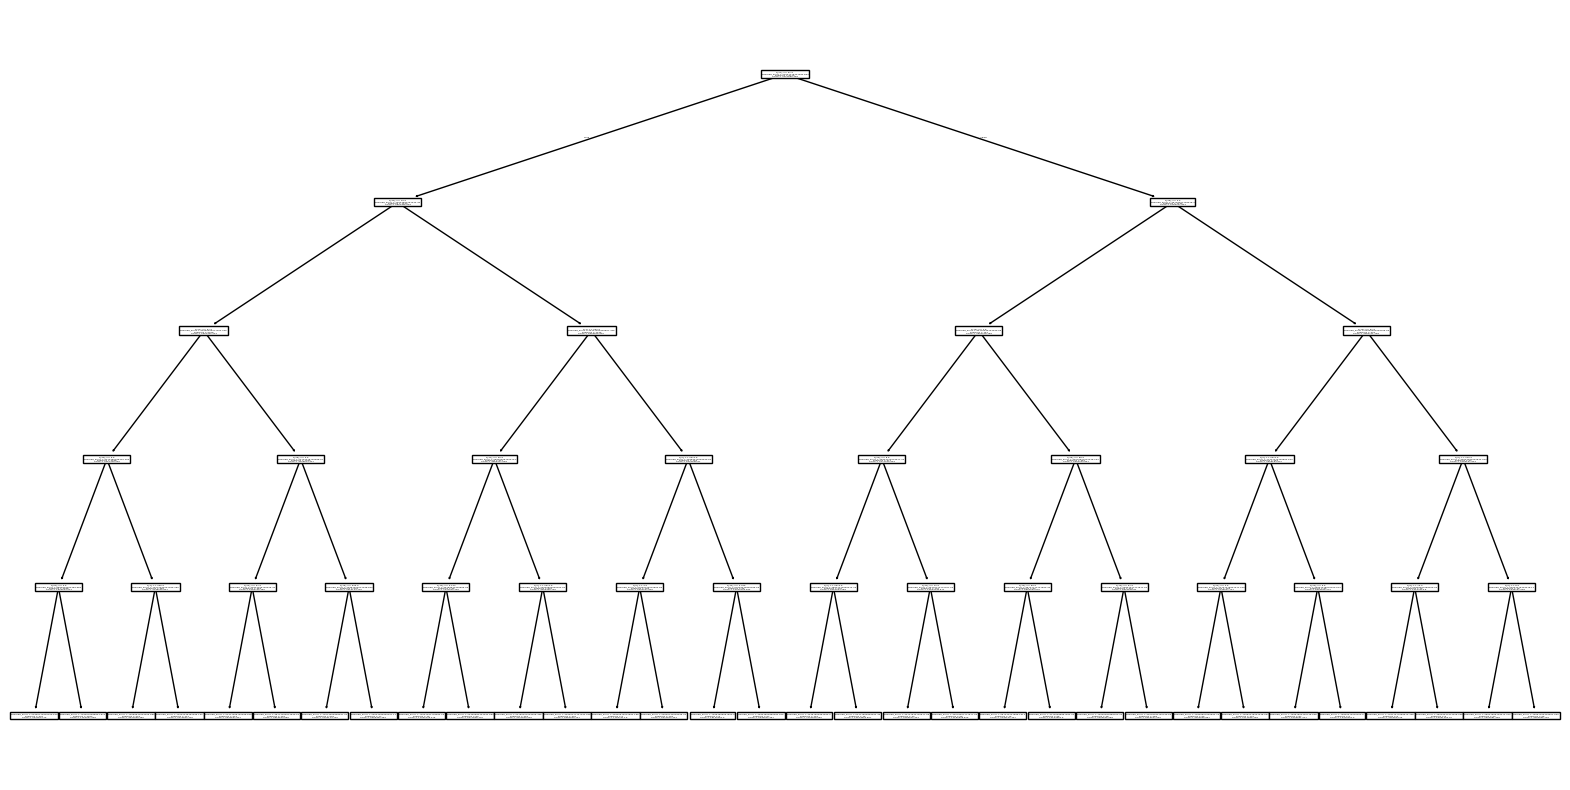

In [941]:
from sklearn.tree import plot_tree

plt.rcParams["figure.figsize"] = (20,10)
_ = plot_tree(tree)

In [942]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error

In [943]:
y_test_pred = tree.predict(X_test)

y_test_pred

ValueError: could not convert string to float: 'hamiljo03'

In [924]:
{'R^2': explained_variance_score(y_test, y_test_pred),
 'MSE': mean_squared_error(y_test, y_test_pred),
 'MAE': mean_absolute_error(y_test, y_test_pred),
}

NameError: name 'y_test' is not defined

# Machine Learning Salary Random Forest

In [925]:
from sklearn.ensemble import RandomForestRegressor

?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

In [926]:
forest = RandomForestRegressor(n_estimators=10, min_samples_split=5, min_samples_leaf=4)
forest.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=5, n_estimators=10)

In [927]:
y_test_pred = forest.predict(X_test)

y_test_pred

ValueError: could not convert string to float: 'hamiljo03'

In [928]:
{'R^2': explained_variance_score(y_test, y_test_pred),
 'MSE': mean_squared_error(y_test, y_test_pred),
 'MAE': mean_absolute_error(y_test, y_test_pred),
}

NameError: name 'y_test' is not defined